In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [46]:
train=pd.read_csv("E:\\python\\PCA\\MNIST\\train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
digits=train['label']
train.drop(['label'],axis=1,inplace=True)

In [48]:
X=train.values

In [49]:
Std_X=(X-X.mean())/X.std()

In [50]:
Std_X1=pd.DataFrame(StandardScaler().fit_transform(X).T)
Std_X2=pd.DataFrame(StandardScaler().fit_transform(X))

C:\Users\Srivatsav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [51]:
type(Std_X1)

pandas.core.frame.DataFrame

In [13]:
cov_mat=Std_X1.cov()

In [52]:
mean_vec=np.mean(Std_X2,axis=0)

In [53]:
mean_vec.shape

(784,)

In [54]:
mean_vec.shape

(784,)

In [55]:
cov_mat=(Std_X2-mean_vec).T.dot(Std_X2-mean_vec)/(Std_X2.shape[0]-1)

In [56]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)

In [26]:
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

In [57]:
eig_pairs.sort(key=lambda x:x[0],reverse=True)

In [58]:
tot=sum(eig_vals)

In [59]:
var_exp=[i/tot*100 for i in sorted(eig_vals, reverse=True)]

In [60]:
cum_sum=np.cumsum(var_exp)

In [36]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [38]:
trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_sum,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
    hoverinfo= cum_sum,
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
    hoverinfo= var_exp,
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')
fig['data'] += [go.Scatter(x= list(range(784)) , y=cum_sum, xaxis='x2', yaxis='y2', name = 'Cumulative Explained Variance')]
fig['data'] += [go.Scatter(x=list(range(784)), y=var_exp, xaxis='x2', yaxis='y2',name = 'Individual Explained Variance')]

# fig['data'] = data
# fig['layout'] = layout
# fig['data'] += data2
# fig['layout'] += layout2
py.iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x1,y1 ]

With insets:
[ x2,y2 ] over [ (1,1) x1,y1 ]



In [61]:
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
#eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_

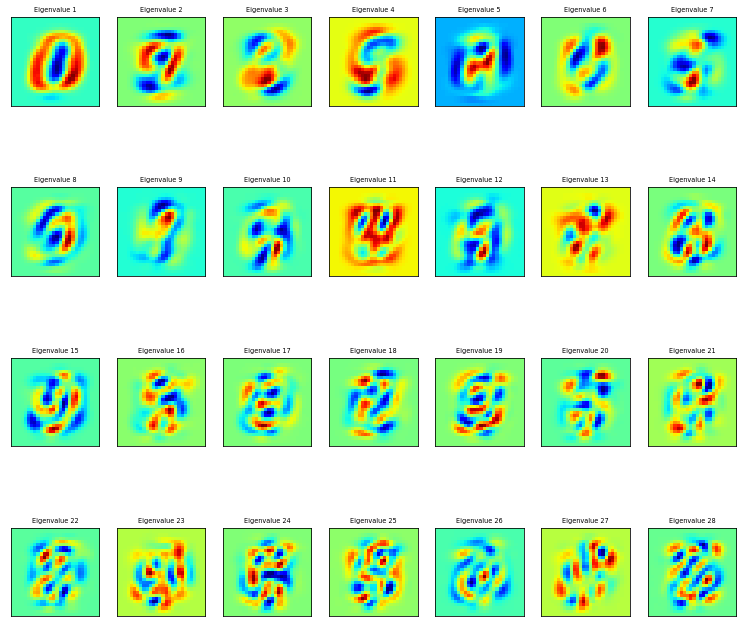

In [62]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
#     for offset in [10, 30,0]:
#     plt.subplot(n_row, n_col, i + 1)
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

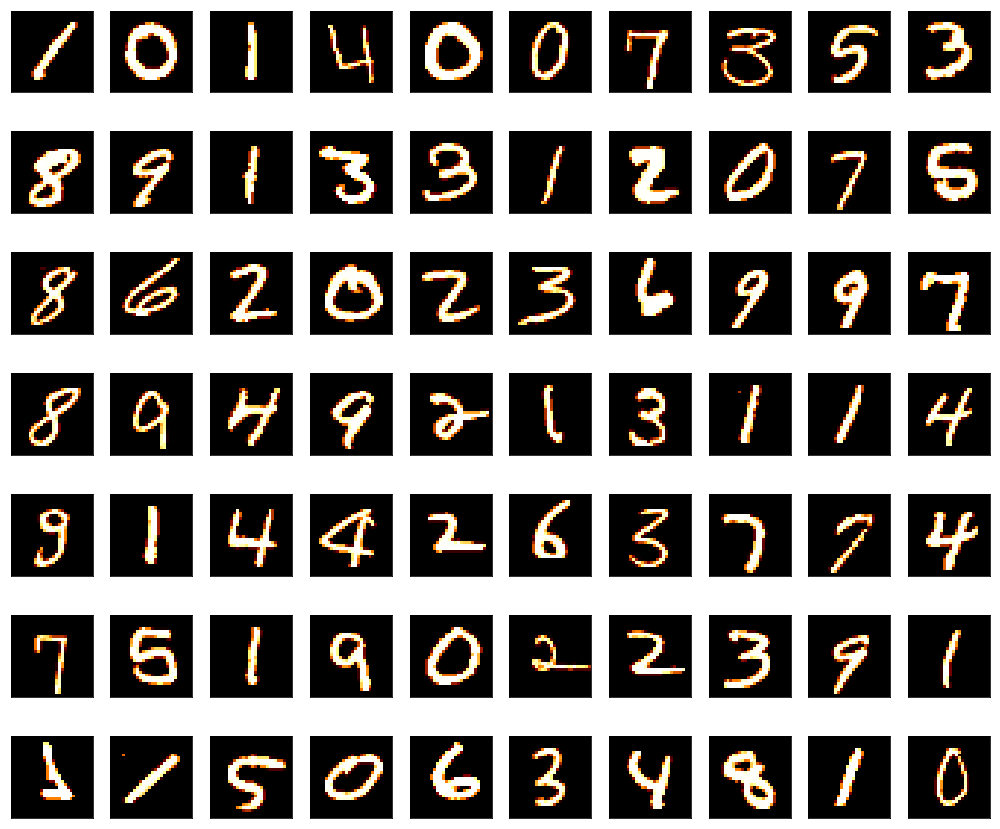

In [63]:
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [64]:
del X
# Taking only the first N rows to speed things up
X= train[:6000].values
del train
# Standardising the values
X_std = StandardScaler().fit_transform(X)

# Call the PCA method with 5 components. 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)

# For cluster coloring in our Plotly plots, remember to also restrict the target values 
Target = digits[:6000]

C:\Users\Srivatsav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [66]:
trace0 = go.Scatter(
    x = X_5d[:,0],
    y = X_5d[:,1],
    name = Target,
    hoveron = Target,
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')
